# 리뷰 데이터 분할 
* 캐치테이블의 입장에서 새로 들어오는 점주들에게 해줄 수 있는 조언(분석 기반)과 현재 요식업의 트렌드를 알 수 있을 것으로 기대중
* 타임라인 탭에서 카테고리 및 식당을 가리지 않고 크롤링해온 데이터에서 기준을 가지고 데이터를 나누어 분석을 진행할 예정
  * 별점 카운트 및 나누기
  * 댓글 존재 여부
  * 좋아요 존재 여부
  * 카테고리 밸류 카운트
  * 그냥 전체 리뷰 분석
  * 평점 높은 음식 카테고리
   -> 요즘 인기 많은 음식 카테고리를 확인하여 창업 시 분야 선택에 도움줄 수 있음

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/캐치테이블 리뷰 크롤링 및 텍스트데이터분석/review_content.csv')

In [4]:
df.head()

,bistro_name,score,content,category,like,comment
0,옥돌,5.0,차돌부추파스타 / 채끝 스테이크 주문\n\n차돌 부추 파스타 처음 입에 넣고 씹기전...,파스타,1,0
1,도쿄등심 서여의도점,5.0,믿고 먹는 도쿄등심!!!\n서여의도 점은 특히 전석 룸이라서 너무 좋아요 룸은항상 ...,소고기구이,0,0
2,바깥,5.0,발렌타인 기념으로 방문했는데\n서비스도 너무 좋고 맛도 너무 좋은데\n그에 비해 가...,와인,1,0
3,스시미야비,4.8,두번째 방문인데 너무 잘먹었습니다 ㅎㅎ\n첫방문때 맛있게 먹은 기억으로 또찾았는데 ...,스시오마카세,0,0
4,루젤라,4.7,"좋은 재료와 정성을 들인 레시피, 페어링한 와인까지 완벽하고...\n피에르 가니에르...",다이닝바,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4121 entries, 0 to 4120
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bistro_name  4121 non-null   object 
 1   score        4121 non-null   float64
 2   content      4121 non-null   object 
 3   category     4117 non-null   object 
 4   like         4121 non-null   int64  
 5   comment      4121 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 193.3+ KB


In [ ]:
df.describe()

,score,like,comment
count,4121.000000,4121.000000,4121.000000
mean,4.815093,0.598156,0.022082
std,0.352123,0.970505,0.210749
min,3.500000,0.000000,0.000000
25%,4.700000,0.000000,0.000000
50%,5.000000,0.000000,0.000000
75%,5.000000,1.000000,0.000000
max,5.000000,7.000000,10.000000


In [ ]:
df.isna().sum()

bistro_name    0
score          0
content        0
category       4
like           0
comment        0
dtype: int64

In [ ]:
df[df.isna( ).any(axis=1)]

,bistro_name,score,content,category,like,comment
132,SUITE ROOM (스위트룸),5.0,넓고 편안한 분위기. 일요일에는 한가한편이네요. 칵테일은 좋았고 음식은 일요일이라 ...,NaN,0,0
2774,SUITE ROOM (스위트룸),5.0,여기 처음들어가면 진짜 헉! 소리 납니다 ㄹㅇ 분위기 깡패에다가 가게가 엄청 넓어서...,NaN,0,0
3661,스시사,5.0,김학준 셰프님의 스시사 정말 좋았습니다 특히 샤코 우니는 환상적 이였습니다 전복또한...,NaN,0,0
4031,스시사,5.0,차분한 분위기에서 차분한 김학준 쉐님의 매력.\n런치 15에\n츠마미 두개 나오고 ...,NaN,0,0


In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
df.drop('bistro_name',axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4117 entries, 0 to 4120
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   score     4117 non-null   float64
 1   content   4117 non-null   object 
 2   category  4117 non-null   object 
 3   like      4117 non-null   int64  
 4   comment   4117 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 193.0+ KB


In [ ]:
df['content'] = df['content'].str.replace('\n', '')

In [ ]:
df['category'] = df['category'].str.replace('\n', '')

In [ ]:
df['category'] = df['category'].str.strip()

In [ ]:
tot_text = df['content']
tot_text.to_csv('모든리뷰.txt',index = False)

### 별점 밸류 카운트

In [ ]:
df['score'].value_counts()

5.0    2904
4.7     341
4.3     204
4.8     170
4.0     165
4.5     106
3.7      88
4.2      64
3.8      44
3.5      31
Name: score, dtype: int64

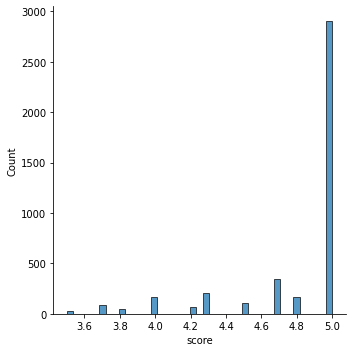

In [ ]:
sns.displot(df['score'])
# 5점 4점대 3점대로 나누어서 텍스트분석

In [ ]:
score5 = df[df['score']==5].reset_index().drop('index',axis=1)
score5 = score5['content']
score5.to_csv('5점대대.txt',index = False)

In [ ]:
score4 = df[(df['score']>4)&(df['score']<5)].reset_index().drop('index',axis=1)
score4 = score4['content']
score4.to_csv('4점대.txt',index = False)

In [ ]:
score3 = df[df['score']<=4].reset_index().drop('index',axis=1)
score3 = score3['content']
score3.to_csv('3점대.txt',index = False)

In [ ]:
# df['category'].head(7)
# df.groupby('category')['score'].mean()
# top7_category = ['스시오마카세','다이닝바','이탈리아음식','한우오마카세','와인','일식','소고기구이']
top_5 = df[(df['category']=='스시오마카세')|(df['category']=='다이닝바')|(df['category']=='이탈리아음식')|(df['category']=='한우오마카세')|(df['category']=='와인')]
top_5 = top_5['content']
top_5.to_csv('리뷰수탑5.txt',index=False)
# df_top7

In [ ]:
# 좋아요가 0이 아닌 리뷰글들
like = df[df['like']!=0].reset_index().drop('index',axis=1)
like = like['content']
like.to_csv('좋아요요.txt',index = False)

In [ ]:
# 댓글수가 0이 아닌 리뷰글들들
df[df['comment']!=0].reset_index().drop('index',axis=1)

,score,content,category,like,comment
0,4.0,맛은 괜찮았으나 서비스가 별로였어요원래 그런건지 알았는데 다른 테이블 손님 왔을때랑...,한우오마카세,0,1
1,5.0,"와인을 제대로 마셔본 게 처음인데, 제가 원하는 와인의 맛이나 향을 말씀드리니까 바...",와인,1,1
2,5.0,"부모님 생신 기념으로 방문했습니다.내부는 깔끔하고 분위기도 조용하니 좋은데다,사진처...",소고기구이,2,1
3,5.0,"웨딩 쿠폰으로 점심식사를 했는데,음식 퀄리티도 좋았고, 맛도 좋았습니다👍👍다음번에 ...",중식,0,1
4,5.0,고즈넉한 분위기와 함께 맛있는 음식도 즐길 수 있는 곳이에요! 특히 뇨끼 너무 맛있...,이탈리아음식,1,1
...,...,...,...,...,...
75,5.0,어머니 칠순 기념으로 방문했는데 센스쟁이 사모님이 물수건을 따로 준비해주셔서 감동했...,스시오마카세,2,1
76,5.0,남자친구랑 간만에 분위기 있고 맛있는 곳에서 밥먹고 싶어서 찾아서 간 집인데 직원분...,한우오마카세,1,1
77,5.0,작년 크리스마스 이후로 오랜만에 방문했어요메뉴 개편이 많이 되었어요 :)선택의 폭이...,유러피안음식,3,1
78,4.2,분위기 깨끗하고 쉐프와 직원의 응대는 아주 좋왔는데 사리가 좀설익은 밥같이 너무꼬들...,스시오마카세,0,1


In [ ]:
# 댓글과 좋아요가 모두 0이 아닌 리뷰글들들
li_co = df[(df['like']!=0) & (df['comment']!=0)].reset_index().drop('index',axis=1)
li_co = li_co['content']
li_co.to_csv('좋아요와 댓글.txt',index = False)
# 댓글이 0개가 아닌것과 좋아요와 댓글이 모두있는게 차이가 얼마 안나서 하나만할까 생각중.